In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('RTA Dataset.csv')

# Display the first few rows
print(df)

           Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior h

In [4]:
print(df.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [6]:
# Define the critical columns that must not have missing values
critical_columns = [
    "Time", "Day_of_week", "Age_band_of_driver", "Sex_of_driver",
    "Type_of_vehicle", "Accident_severity"
]

# Check if the columns exist in the DataFrame before attempting to drop missing values
existing_columns = [col for col in critical_columns if col in df.columns]

# Drop rows with missing values in the critical columns
df = df.dropna(subset=existing_columns)

# Handle optional columns with explicit casting and assignment
if "Service_year_of_vehicle" in df.columns:
    # Convert column to string type before filling missing values
    df["Service_year_of_vehicle"] = df["Service_year_of_vehicle"].astype(str).fillna("Unknown")

# Display the cleaned dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 11366 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         11366 non-null  object
 1   Day_of_week                  11366 non-null  object
 2   Age_band_of_driver           11366 non-null  object
 3   Sex_of_driver                11366 non-null  object
 4   Educational_level            10725 non-null  object
 5   Vehicle_driver_relation      10875 non-null  object
 6   Driving_experience           10651 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             10965 non-null  object
 9   Service_year_of_vehicle      11366 non-null  object
 10  Defect_of_vehicle            7320 non-null   object
 11  Area_accident_occured        11165 non-null  object
 12  Lanes_or_Medians             11020 non-null  object
 13  Road_allignment              11241 n

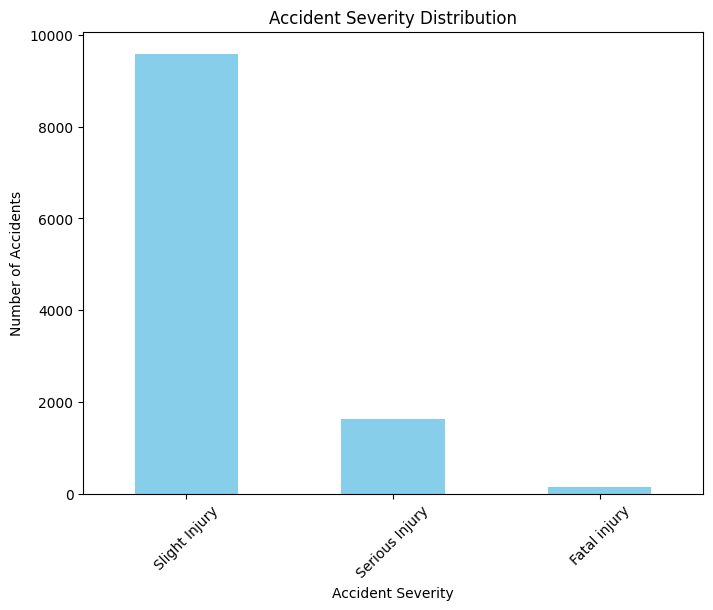

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of accident severity
severity_counts = df["Accident_severity"].value_counts()

plt.figure(figsize=(8, 6))
severity_counts.plot(kind="bar", color="skyblue")
plt.title("Accident Severity Distribution")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


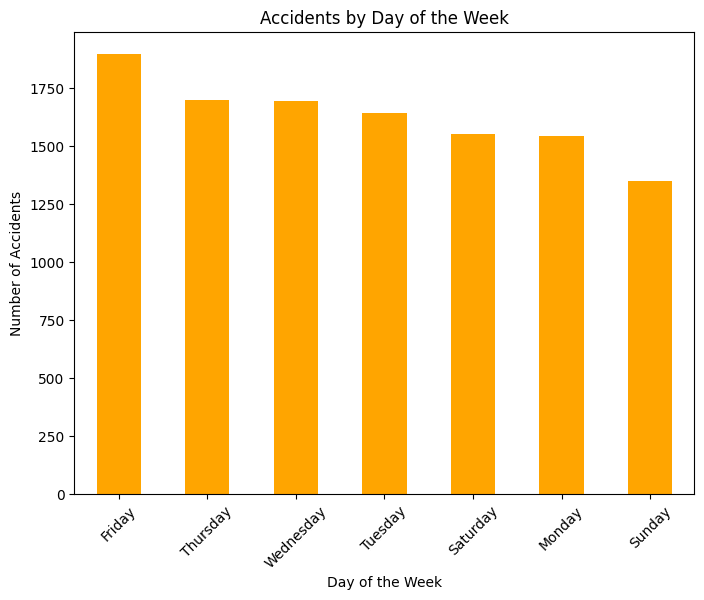

In [8]:
# Plot accidents by day of the week
day_counts = df["Day_of_week"].value_counts()

plt.figure(figsize=(8, 6))
day_counts.plot(kind="bar", color="orange")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

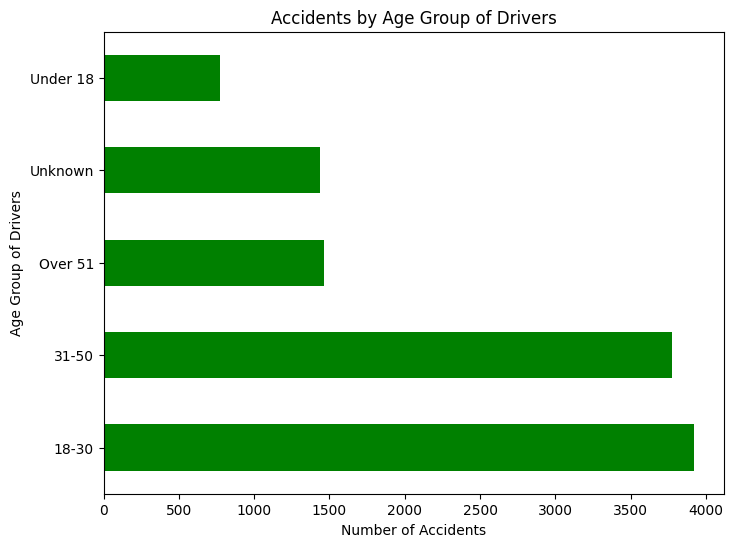

In [9]:
# Plot accidents by age group of drivers
age_counts = df["Age_band_of_driver"].value_counts()

plt.figure(figsize=(8, 6))
age_counts.plot(kind="barh", color="green")
plt.title("Accidents by Age Group of Drivers")
plt.xlabel("Number of Accidents")
plt.ylabel("Age Group of Drivers")
plt.show()


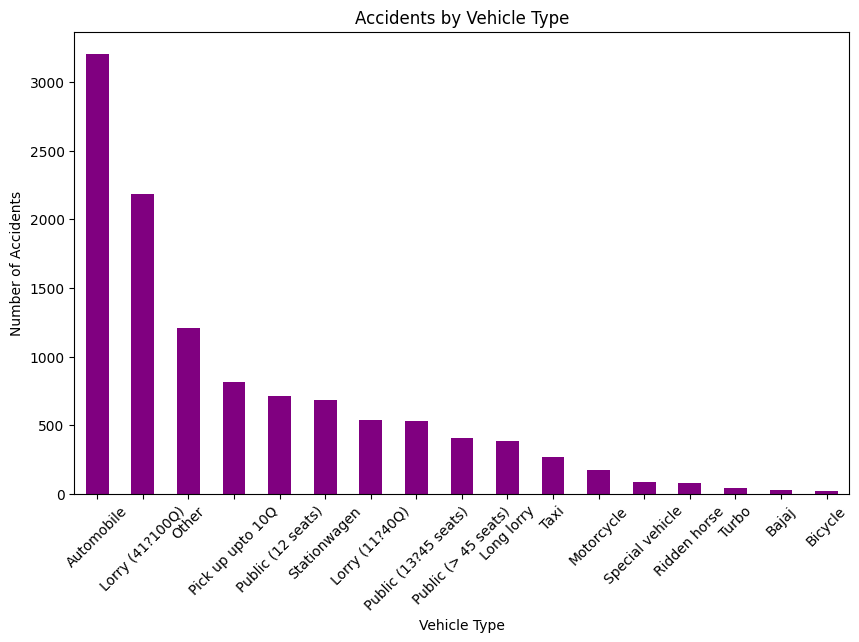

In [10]:
vehicle_counts = df["Type_of_vehicle"].value_counts()

plt.figure(figsize=(10, 6))
vehicle_counts.plot(kind="bar", color="purple")
plt.title("Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

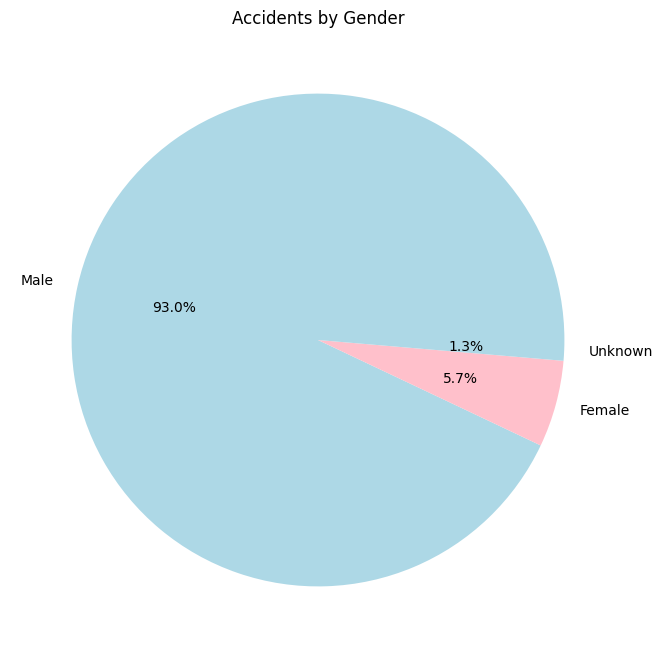

In [13]:
import matplotlib.pyplot as plt

# Plot accidents by gender
gender_counts = df["Sex_of_driver"].value_counts()

plt.figure(figsize=(8, 8))
gender_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "pink"])
plt.title("Accidents by Gender")
plt.ylabel("")  # Remove the default ylabel
plt.show()

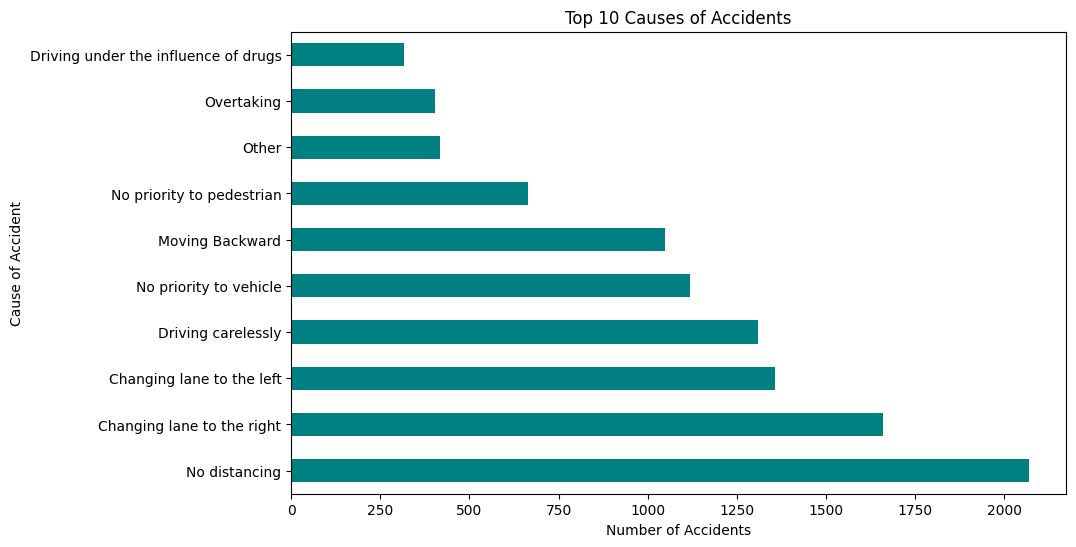

In [23]:
# Plot causes of accidents
cause_counts = df["Cause_of_accident"].value_counts().head(10)

plt.figure(figsize=(10, 6))
cause_counts.plot(kind="barh", color="teal")
plt.title("Top 10 Causes of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Cause of Accident")
plt.show()
